## Ejercicios de pair programming 18 enero: Test estadísticos

1- ¿Qué diferencia existe el error de tipo I y el error de tipo II?
 Un error de Tipo I es si rechazamos la hipótesis nula cuando es verdadera, y un error de tipo II al revés, si aceptamos la hipótesis nula cuando es falsa.

2- ¿Qué es la asimetría?
 La asimetría es la falta de simetría que presenta una distribución teniendo en cuenta la media, es decir cuando la media no coíncide con la mediana y la moda. 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy.stats import kstest
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv("../datos/world_risk_index2.csv", index_col = 0)
df.head()

,region,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_category,wri_category,vulnerability_category,susceptibility_category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


In [5]:
outliers = pd.read_csv("../datos/world_risk_index_outliers.csv", index_col = 0)
outliers.head()

,region,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_category,wri_category,vulnerability_category,susceptibility_category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


In [7]:
df_limpio = pd.read_csv("../datos/world_risk_index_sin_outliers.csv", index_col = 0)
df_limpio.head()

,region,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_category,wri_category,vulnerability_category,susceptibility_category
11,Papua-Neuguinea,15.45,23.26,66.41,50.04,84.83,64.36,2011,Very High,Very High,Very High,Very High
12,Madagaskar,14.46,20.68,69.91,67.51,85.65,56.57,2011,Very High,Very High,Very High,Very High
14,Afghanistan,14.06,18.45,76.19,61.09,93.94,73.55,2011,Very High,Very High,Very High,Very High
15,Niger,14.03,18.49,75.86,69.38,89.54,68.65,2011,Very High,Very High,Very High,Very High
16,Gambia,13.90,22.20,62.63,45.29,83.99,58.62,2011,Very High,Very High,High,High


3 - ¿Es vuestra variable respuesta asimétrica?

In [10]:
#Conjunto de datos
print('El skew del conjunto de datos es:', df['exposure'].skew())
print('El skew de los outliers es:', outliers['exposure'].skew())
print('El skew de los datos sin outliers es:', df_limpio['exposure'].skew())

El skew del conjunto de datos es: 2.757231258941327
El skew de los outliers es: 0.7376705402155904
El skew de los datos sin outliers es: 0.39991992650175473


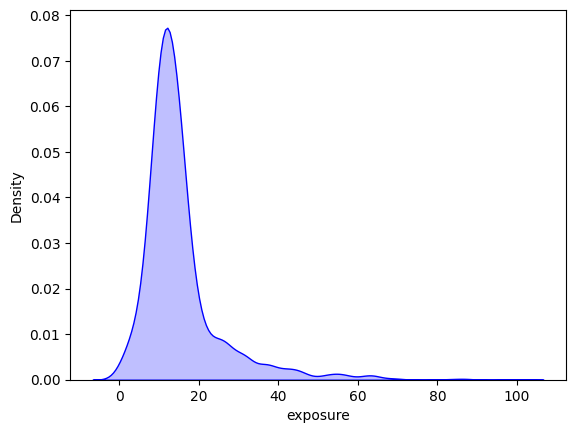

In [12]:
#Conjunto de datos
sns.distplot(
    df["exposure"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

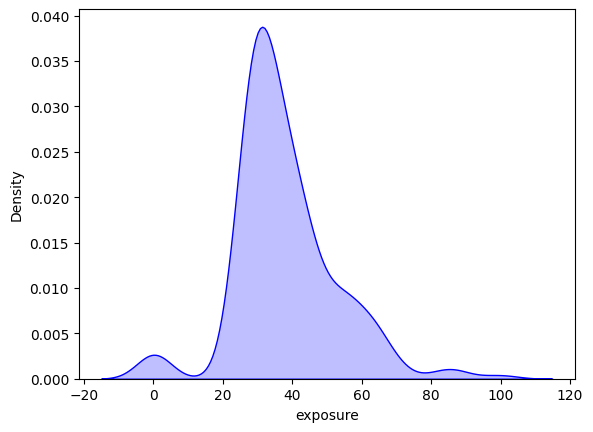

In [13]:
sns.distplot(
    outliers["exposure"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

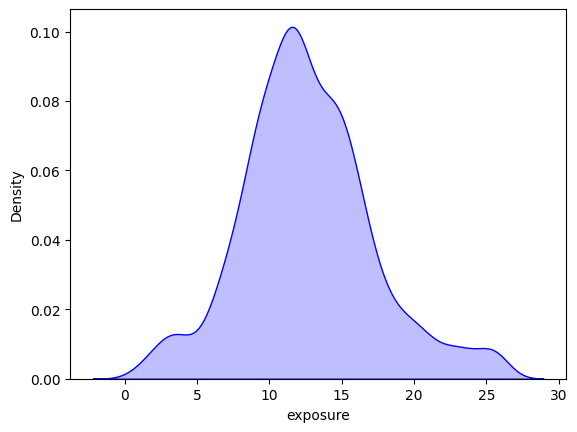

In [14]:
sns.distplot(
    df_limpio["exposure"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

Nuestra variable respuesta no es simétrica, tiene una asimetría positiva ya que el valor del skew 2.75.
En cambio al separar los outliers notamos que la distribución tiende a la simetría y parece tener una distribución más normal. 
Los outliers son más normales que los datos en conjuntos pero sigue siendo asimetrica positiva con un valor de 0,75.

4 - ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [22]:
print(f'''La curtosis del conjunto de datos es: 
{kurtosistest(df['exposure'])}''')
print ('---------------------')
print(f'''La curtosis de los outliers es: 
{kurtosistest(outliers['exposure'])}''')
print ('---------------------')
print(f'''La curtosis de los datos sin outliers es: 
{kurtosistest(df_limpio['exposure'])}''')
print ('---------------------')

La curtosis del conjunto de datos es: 
KurtosistestResult(statistic=19.016521784124464, pvalue=1.2447206461942722e-80)
---------------------
La curtosis de los outliers es: 
KurtosistestResult(statistic=4.2094496684011276, pvalue=2.55993459130919e-05)
---------------------
La curtosis de los datos sin outliers es: 
KurtosistestResult(statistic=4.156429953383866, pvalue=3.232592204540685e-05)
---------------------


La variable respuesta tanto con como sin outliers es leptocúrtica y muestra una morfología afilada

5- ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

In [24]:
print(f'''La normalidad del conjunto de datos es: 
{kstest(df['exposure'], 'norm')}''')
print ('---------------------')
print(f'''La normalidad de los outliers es: 
{kstest(outliers['exposure'], 'norm')}''')
print ('---------------------')
print(f'''La normalidad de los datos sin outliers es: 
{kstest(df_limpio['exposure'], 'norm')}''')
print ('---------------------')

La normalidad del conjunto de datos es: 
KstestResult(statistic=0.9829459870076139, pvalue=0.0)
---------------------
La normalidad de los outliers es: 
KstestResult(statistic=0.966824644549763, pvalue=1.559977630884e-312)
---------------------
La normalidad de los datos sin outliers es: 
KstestResult(statistic=0.9851781284996995, pvalue=0.0)
---------------------


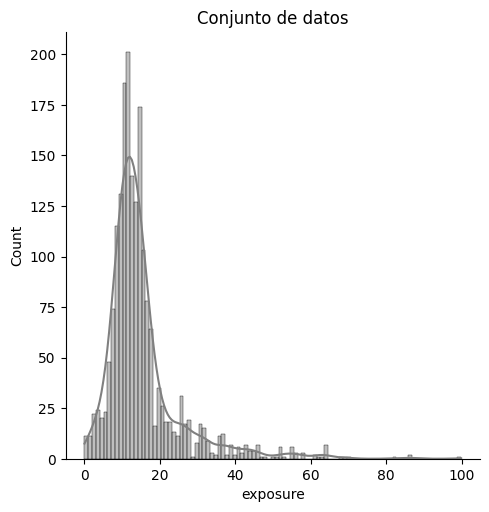

In [29]:
sns.displot(df["exposure"], kde = True, color = "grey")
plt.title('Conjunto de datos');

<Figure size 800x400 with 0 Axes>

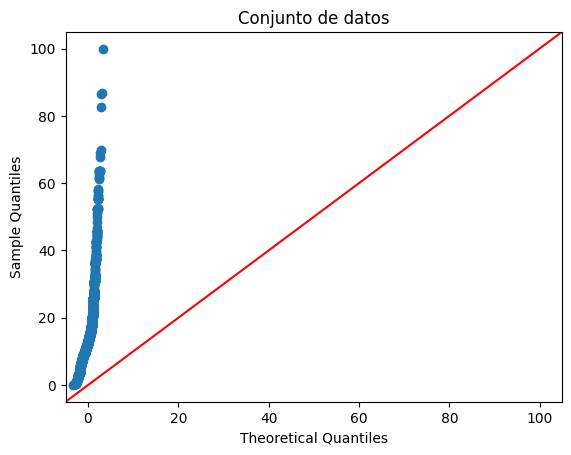

In [30]:
plt.figure(figsize =(8,4))
fig = sm.qqplot(df["exposure"], line ='45')
plt.title('Conjunto de datos');

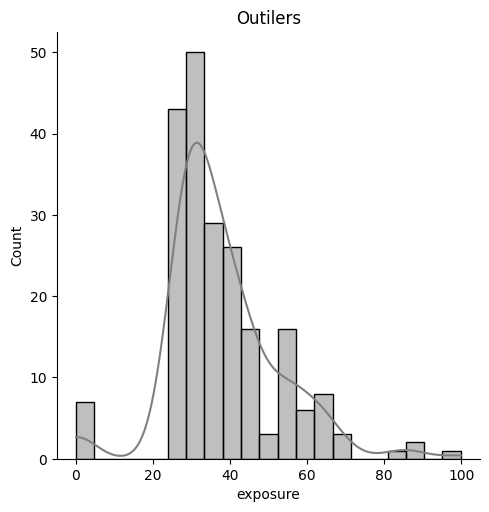

In [31]:
sns.displot(outliers["exposure"], kde = True, color = "grey")
plt.title('Outilers');

<Figure size 800x400 with 0 Axes>

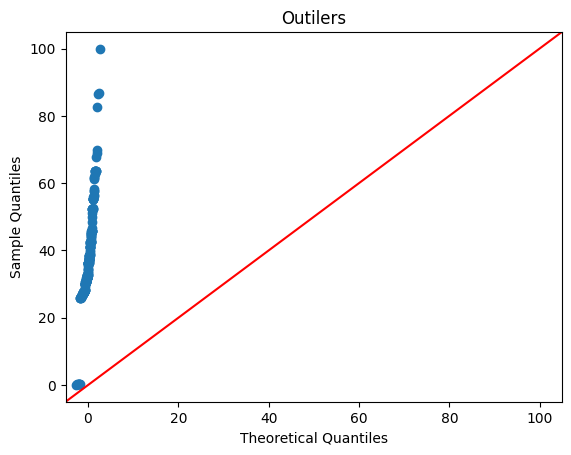

In [32]:
plt.figure(figsize =(8,4))
fig = sm.qqplot(outliers["exposure"], line ='45')
plt.title('Outilers');

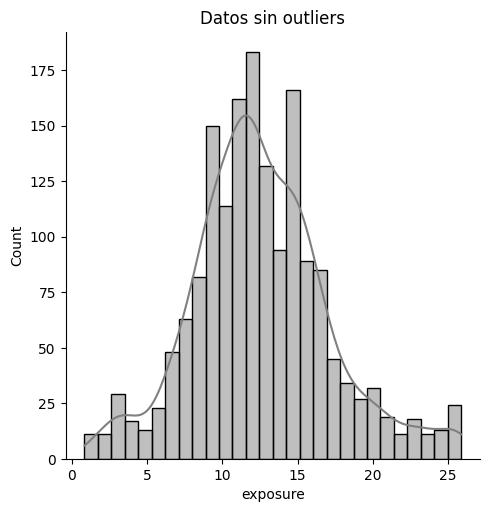

In [33]:
sns.displot(df_limpio["exposure"], kde = True, color = "grey")
plt.title('Datos sin outliers');

<Figure size 800x400 with 0 Axes>

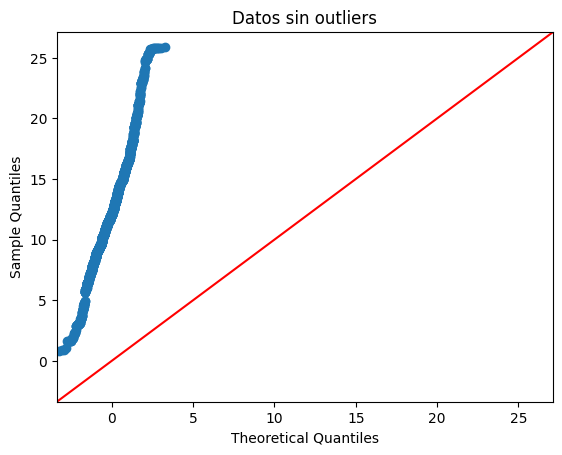

In [34]:
plt.figure(figsize =(8,4))
fig = sm.qqplot(df_limpio["exposure"], line ='45')
plt.title('Datos sin outliers');

Nuestra variable respuesta no es normal, sin embargo al quitar los outliers tiende un poco mas a la normalidad.